**1.1) Library Imports**
This section imports the essential libraries:

NumPy for numerical operations
TensorFlow / Keras for building and training deep learning models
Matplotlib for visualizations

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots


**1.2) Load Dataset**
Load the CIFAR-100 dataset from Keras, splitting it into:

train_images, train_labels → training set
test_images, test_labels → test set

In [2]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


**1.3) Normalize Data**
Scale pixel values from 0–255 to the range 0–1 for faster and more stable training.

Example:

Before: a pixel value could be 200
After: 200 / 255 ≈ 0.78

In [3]:
#normalize the data
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

**1.4) Reshape Data**
Reshape images to 32X32X1 by adding a channel dimension, making them compatible with CNN layers.

Example:

Before: (50000, 32, 32) → 50,000 grayscale images without channel info
After: (50000, 32, 32, 1) → channel dimension (1) added for CNN input

In [4]:
train_images=cifar100_train_images.reshape(cifar100_train_images.shape[0],32,32,3)
test_images=cifar100_test_images.reshape(cifar100_test_images.shape[0],32,32,3)

**1.5) One-Hot Encode Labels**
Convert class labels (0–99) into one-hot encoded vectors with 100 output classes, required for multi-class classification.

Example:

Original label: 3
One-hot encoded: [0. 0. 0. 1. 0. 0. ... 0]   # length = 100

In [5]:
train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

**1.6) Verify Dataset Shapes**
Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.

In [6]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


**2. Model Building**

**2.2) Basic CNN Model**

Conv2D (32, 3×3) + MaxPool → 320 params

Conv2D (64, 3×3) + MaxPool → 18,496 params

Flatten

Dense (64, ReLU) → 102,464 params

Dense (10, Softmax) → 650 params

Total params: ~121K

In [7]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,172 (2.42 MB)

 Trainable params: 635,172 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

**2.2) Deeper CNN Model**

Conv2D (32, 3×3) + BN + MaxPool + Dropout → 320 + 64 params

Conv2D (64, 3×3) + BN + MaxPool + Dropout → 18,496 + 128 params

Conv2D (128, 3×3) + BN + MaxPool + Dropout → 73,856 + 256 params

Flatten

Dense (128, ReLU) + BN + Dropout → 147,584 + 256 params

Dense (10, Softmax) → 1,290 params

Total params: ~242K

Factors to consider when deciding layers
1. Input data complexity

Simple data (MNIST digits, Fashion-MNIST clothes) → a few convolution layers (2–3) are usually enough.

Complex data (CIFAR-10, ImageNet, medical images) → deeper CNNs (10+ layers, sometimes hundreds) are needed to capture hierarchical features.

👉 For 28×28 grayscale (Fashion-MNIST), 3 convolution blocks is already sufficient.

2. Filter size and number of filters

Filter size: (3×3) is the standard (captures local patterns without being too big).

Number of filters: often starts small and doubles as depth increases:

32 → 64 → 128 → (maybe 256).

This helps capture more complex features at deeper layers.

👉 Your model uses exactly that pattern: 32, 64, 128 → ✅ Good choice.

3. Pooling layers

Usually add a MaxPooling2D(2,2) after 1–2 conv layers.

This halves the spatial resolution and reduces computation.

Too much pooling too early can lose information → balance is important.

👉 You’re using pooling after every block — that’s safe.

4. Regularization (BatchNorm, Dropout)

BatchNormalization → stabilizes training & allows higher learning rates.

Dropout → reduces overfitting by randomly zeroing activations.

Typical values: 0.25 for conv layers, 0.5 before dense.

👉 You’re using both correctly.

5. Dense layers

After flattening, use 1–2 dense layers.

Size usually 128, 256, or 512 depending on dataset.

More dense layers = more parameters = risk of overfitting (especially on small datasets).

👉 With 128 dense units, your model is compact and balanced.

6. Output layer

Number of neurons = number of classes.

For Fashion-MNIST → 10 classes → Dense(10, softmax).

For digits 0–99 → Dense(100, softmax).

7. Training/validation feedback

Start small (fewer layers) → train → check learning curves.

If underfitting (low training accuracy, both train/val curves low): add layers/filters.

If overfitting (training accuracy high, validation much lower): add regularization, data augmentation, or reduce dense size.

⚖️ Rules of thumb (for deciding layers)

Start simple → 2–3 conv blocks (32→64→128) + 1 dense layer is a good baseline for 28×28 grayscale.

Increase filters with depth (32→64→128).

Use dropout after dense, sometimes after conv blocks.

Stop when validation accuracy stops improving (no need to blindly add layers).

For bigger images (e.g., 224×224 RGB): deeper CNNs (ResNet, VGG, EfficientNet) are better.



In [8]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,196 (985.14 KB)

 Trainable params: 251,236 (981.39 KB)

 Non-trainable params: 960 (3.75 KB)

**3. Train models**

**3.1) Training Basic CNN Model**

ModelCheckpoint: saves best Basic CNN weights (best_basic_cnn_model_weights.weights.h5) based on validation loss.

Training:

Epochs: up to 30 (early stopping controls actual run)

Batch size: 64

Validation on test set

Callbacks: EarlyStopping + ModelCheckpoint

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [10]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=128,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0787 - loss: 4.1362
Epoch 1: val_loss improved from inf to 3.31940, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.0789 - loss: 4.1353 - val_accuracy: 0.2094 - val_loss: 3.3194
Epoch 2/30
387/391 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2421 - loss: 3.1489
Epoch 2: val_loss improved from 3.31940 to 2.98121, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2423 - loss: 3.1478 - val_accuracy: 0.2704 - val_loss: 2.9812
Epoch 3/30
384/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3121 - loss: 2.7741
Epoch 3: val_loss improved from 2.98121 to 2.77238, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3122 - loss: 2.7735 - val_accuracy: 0.3134 - val_loss: 2.7724
Epoch 4/30
386/391 ━━━━━━━━━━━━━━━━━━━━ 0s

**3.2) Training Deeper CNN Model**

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [11]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0645 - loss: 4.6044
Epoch 1: val_loss improved from inf to 3.60675, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.0645 - loss: 4.6038 - val_accuracy: 0.1522 - val_loss: 3.6067
Epoch 2/30
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1678 - loss: 3.5111
Epoch 2: val_loss improved from 3.60675 to 3.36808, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1680 - loss: 3.5101 - val_accuracy: 0.1907 - val_loss: 3.3681
Epoch 3/30
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2232 - loss: 3.1829
Epoch 3: val_loss improved from 3.36808 to 2.85234, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2233 - loss: 3.1825 - val_accuracy: 0.2920 - val_loss: 2.8523
Epoch 4/30
774/782 ━━━━━━━━━━━━━━━━━

**4. Model Evaluation**

4.1) Model Evaluation Code Explanation
Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-3748213543.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


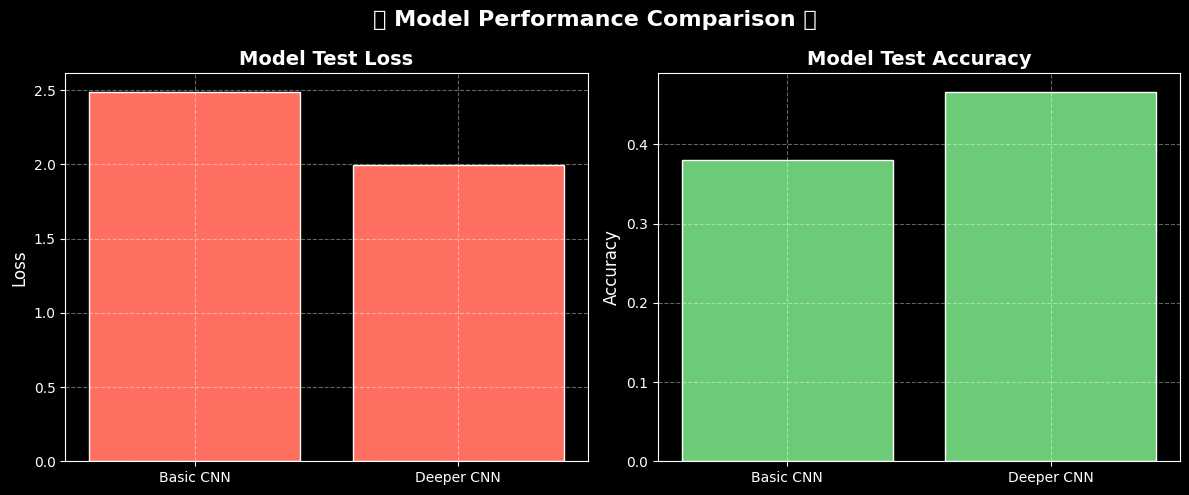

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')


loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Basic CNN', 'Deeper CNN']
losses = [ loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


**4.2) Model Evaluation (Confusion Matrix & Report)**
Predict test images (ANN, Basic CNN, Deeper CNN)
Convert one-hot labels to integers
Get predicted labels with argmax
Print confusion matrix & classification report for each model

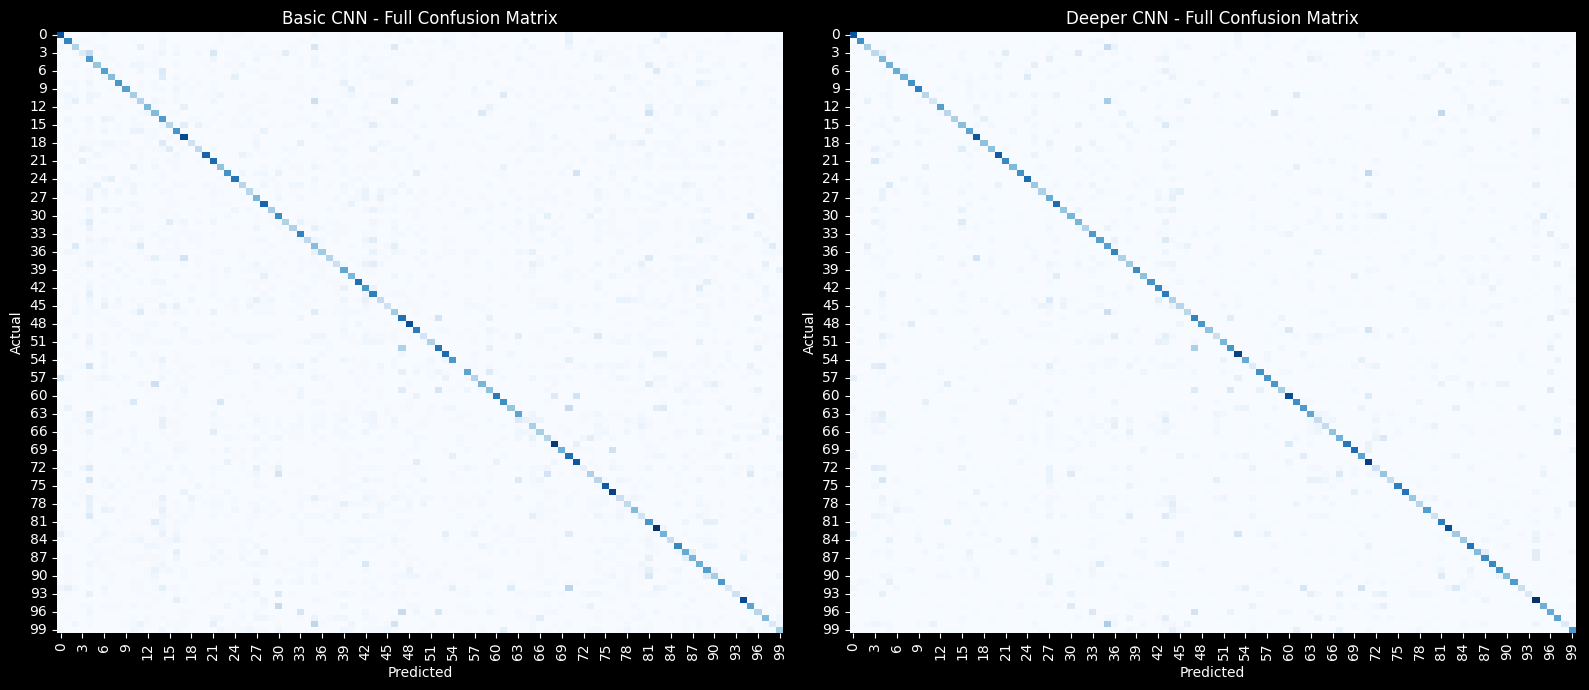

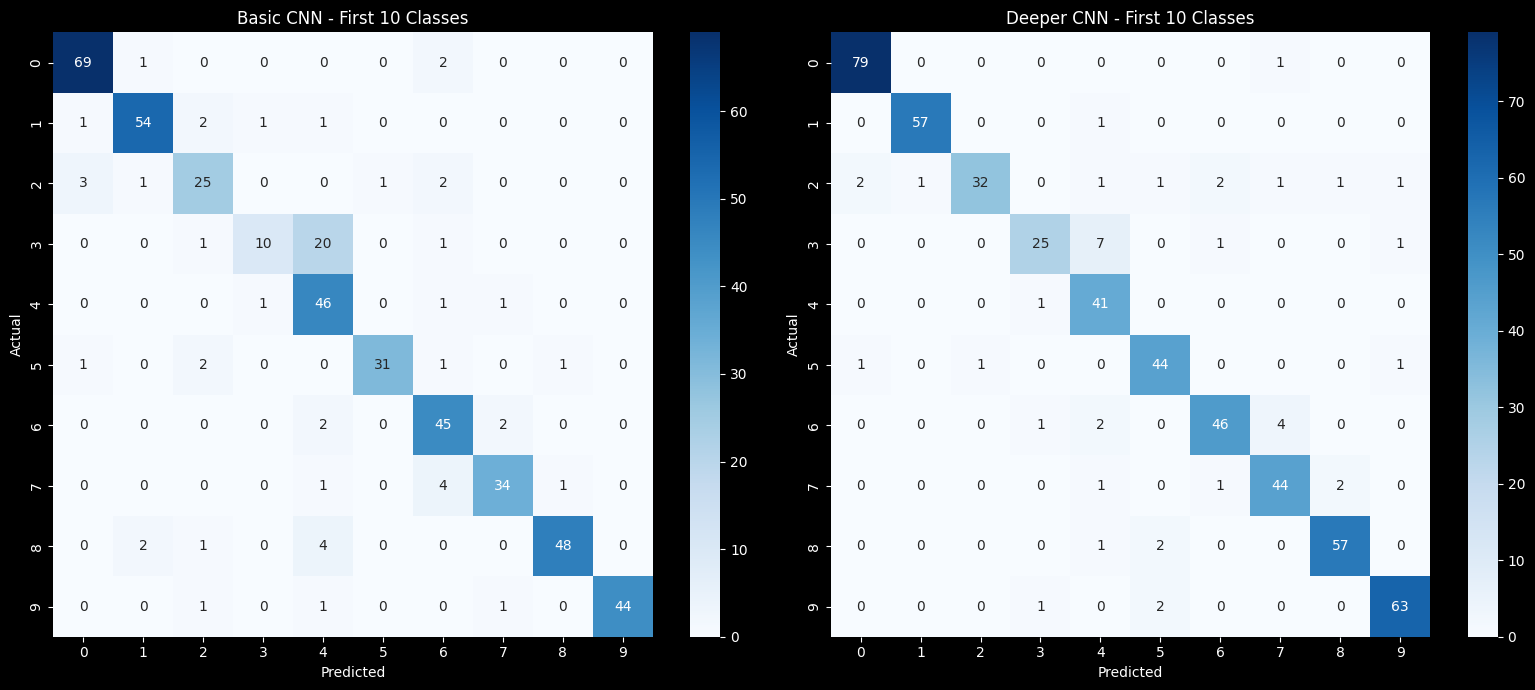

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
basic_cnn_predictions = basic_cnn_model.predict(test_images, verbose=0)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images, verbose=0)

# Convert one-hot labels to integers
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

# Predicted labels
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# --- 1. Full Confusion Matrix (100x100, no annotations) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(cm_basic, cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("Basic CNN - Full Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_deeper, cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("Deeper CNN - Full Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- 2. Zoomed Confusion Matrix (first 10 classes, with numbers) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(cm_basic[:10, :10], annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Basic CNN - First 10 Classes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_deeper[:10, :10], annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Deeper CNN - First 10 Classes")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


**4.3) Model Comparison**
Created a dataframe to store test loss and test accuracy for ANN, Basic CNN, and Deeper CNN.
Plotted training history for each model (accuracy & loss vs. epochs).
Helps compare how models learn and generalize over time.

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': [ 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

**4.4) Predictions**

This code:

Uses the trained Basic CNN model to predict on test images.

Identifies correctly and incorrectly classified samples.

Randomly selects 100 correct and 100 incorrect predictions.

Displays them in a 20×10 grid:

✅ Correct predictions → Green title (only predicted label).

❌ Incorrect predictions → Red title (Predicted vs True label).

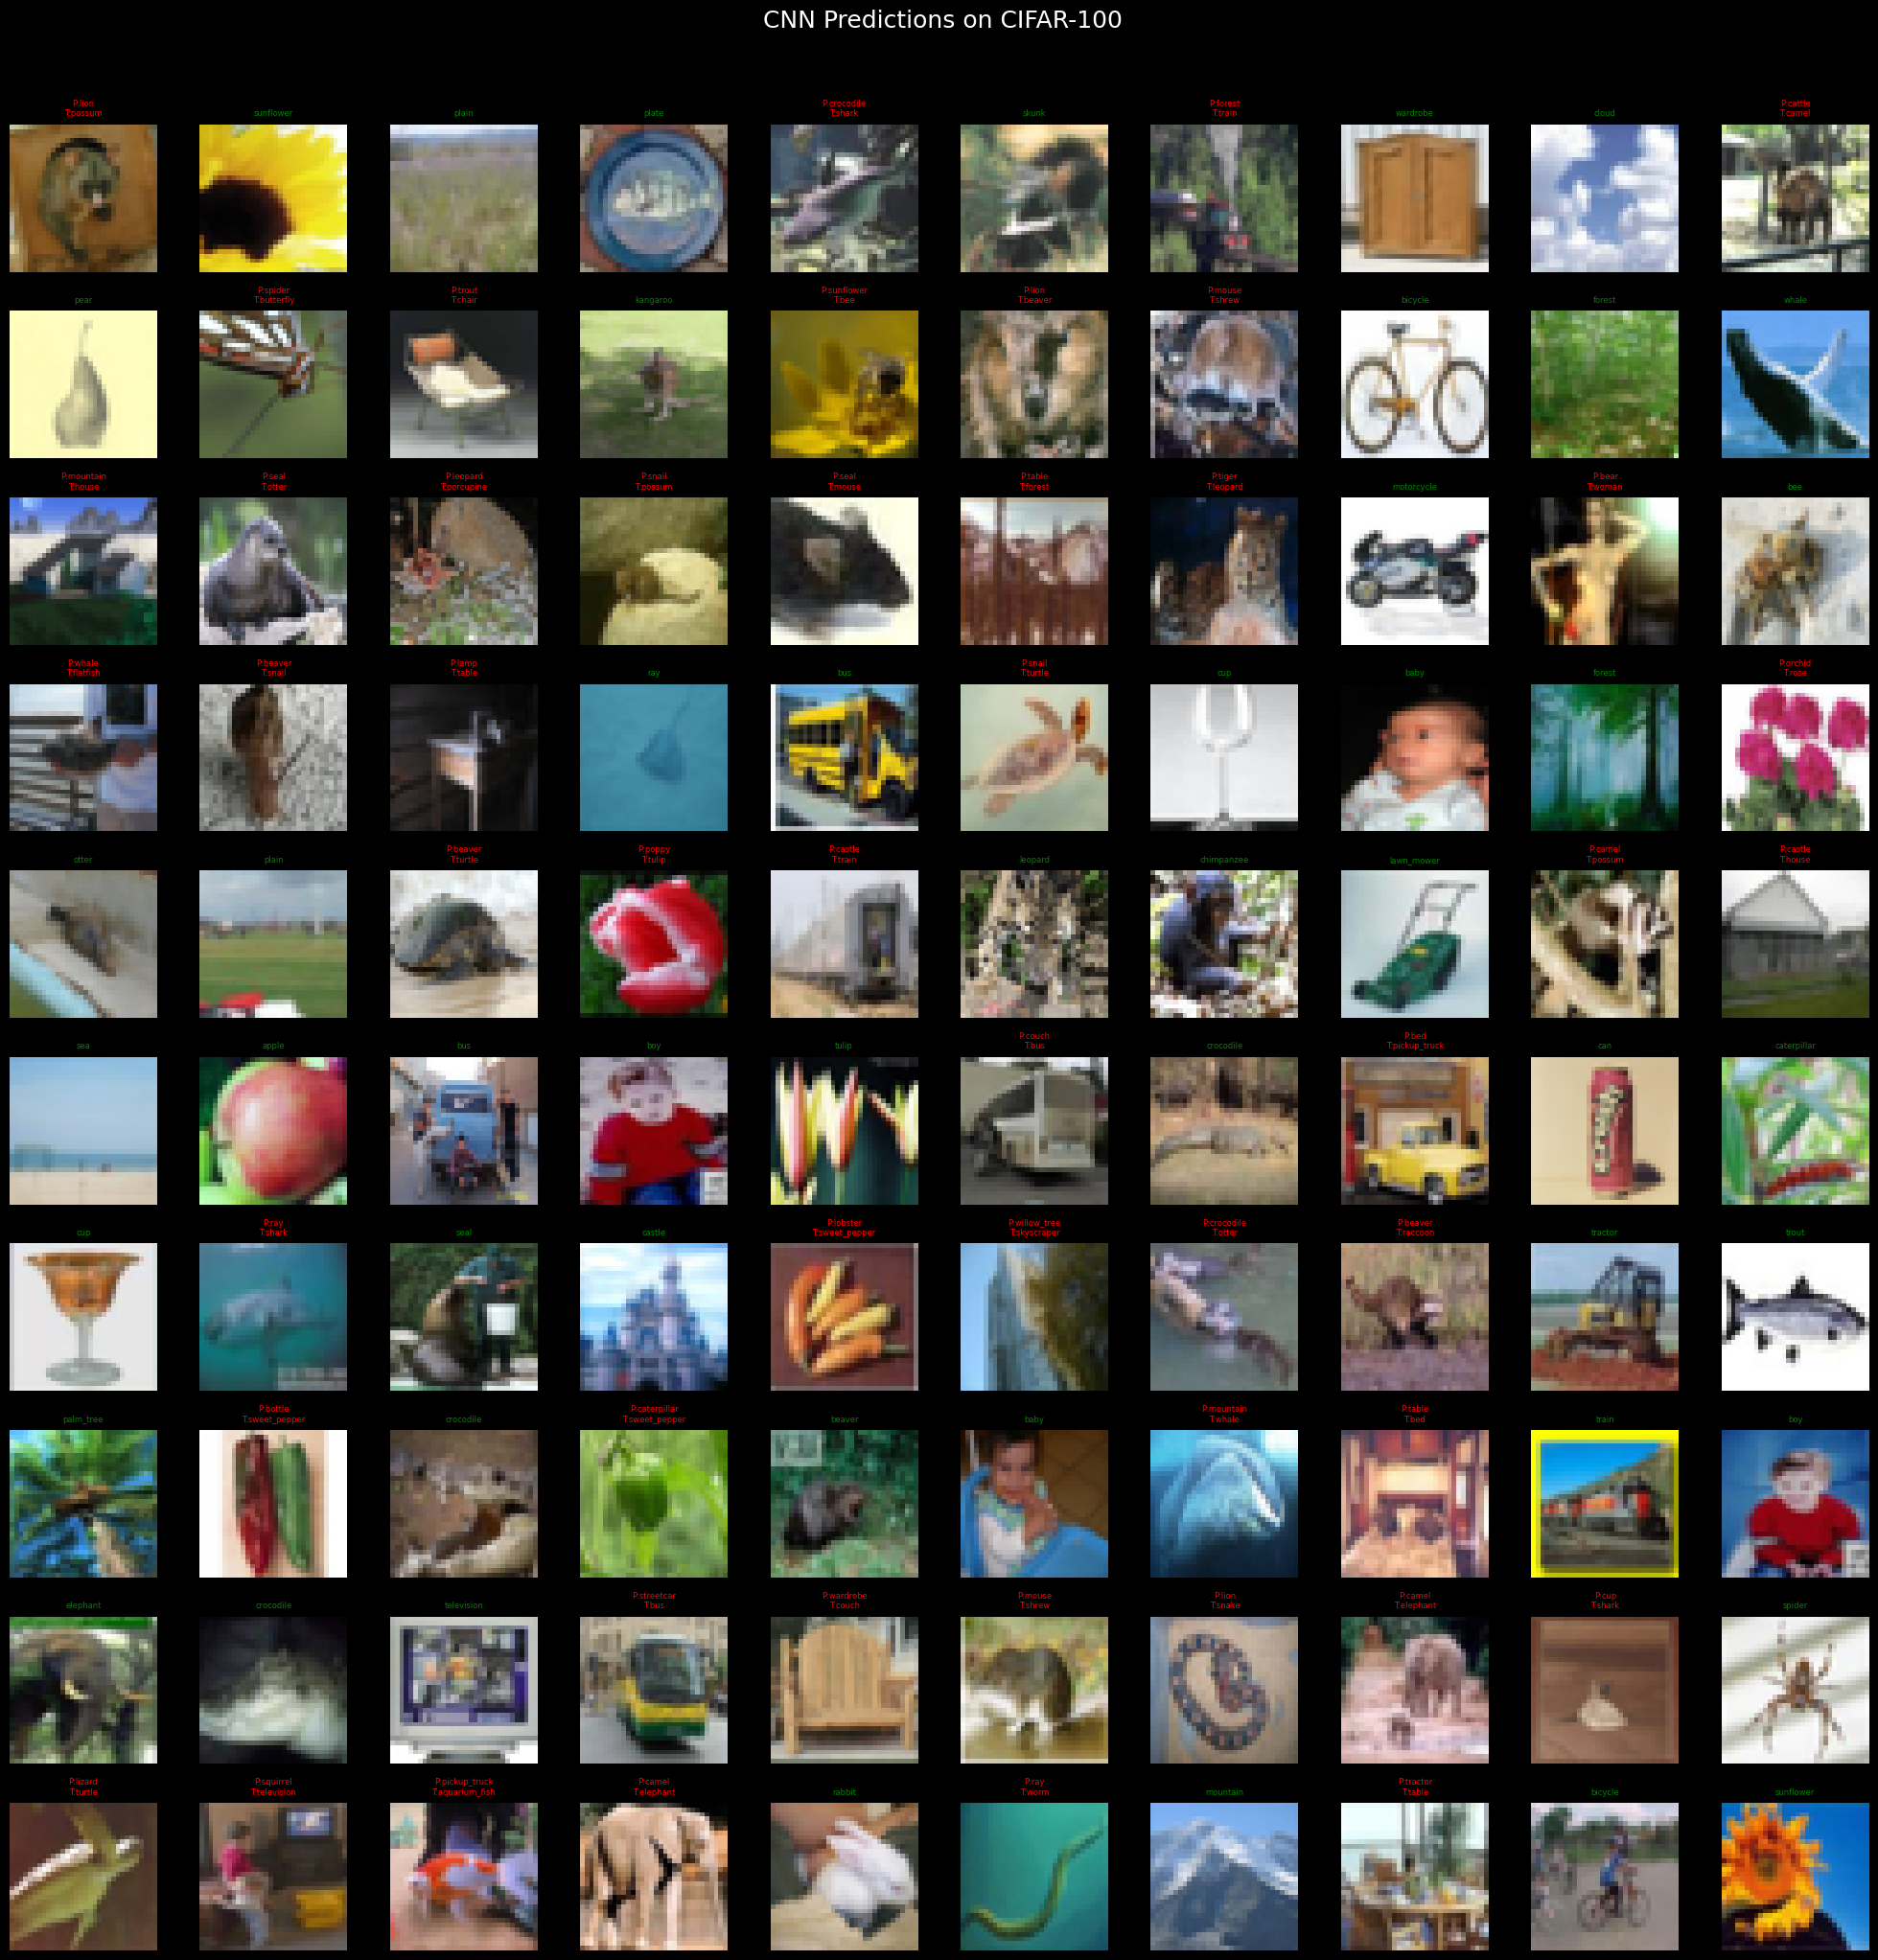

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# CIFAR-100 class names (fine labels: 100 classes)
cifar100_labels = [
    'apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle',
    'bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle',
    'chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur',
    'dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard',
    'lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain',
    'mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree',
    'plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket',
    'rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider',
    'squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor',
    'train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm'
]

# Run predictions with DEEP CNN
deep_predictions = deeper_cnn_model.predict(cifar100_test_images, verbose=0)
deep_predicted_labels = np.argmax(deep_predictions, axis=1)

# True labels (shape = (10000,1), so flatten it)
true_labels = cifar100_test_labels.flatten()

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(deep_predicted_labels == true_labels)[0]
incorrectly_classified_indices = np.where(deep_predicted_labels != true_labels)[0]

# Select some correct & incorrect examples
num_correct_to_show = min(50, len(correctly_classified_indices))
num_incorrect_to_show = min(50, len(incorrectly_classified_indices))

selected_correct = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

all_indices = np.concatenate((selected_correct, selected_incorrect))
np.random.shuffle(all_indices)

# Display grid
num_cols, num_rows = 10, 10  # 100 images (50 correct, 50 incorrect)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle(" CNN Predictions on CIFAR-100", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_rows * num_cols]):
    row, col = divmod(i, num_cols)
    axes[row, col].imshow(cifar100_test_images[idx])  # CIFAR-100 is RGB (32x32x3)

    pred = cifar100_labels[deep_predicted_labels[idx]]
    true = cifar100_labels[true_labels[idx]]

    if deep_predicted_labels[idx] == true_labels[idx]:
        color, title = "green", f"{pred}"
    else:
        color, title = "red", f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=6, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


Key Findings and Conclusion (CIFAR-100, CNN Models Only)

**Basic CNN model:**

The basic CNN with two convolution–pooling blocks provided a solid baseline. It successfully leveraged spatial features and outperformed simpler approaches but reached its limit quickly due to its shallow architecture. The model struggled with the fine-grained complexity of CIFAR-100’s 100 classes, often confusing visually similar categories.

**Deeper CNN model:**

The deeper CNN, incorporating additional convolutional layers along with Batch Normalization and Dropout, achieved higher accuracy and better generalization than the basic CNN. Its greater depth allowed it to learn more hierarchical representations (edges → textures → object parts), which are crucial for distinguishing CIFAR-100 classes. Regularization helped mitigate overfitting, but the dataset’s difficulty means performance is still modest compared to state-of-the-art models.

Overall conclusion:

For CIFAR-100, deeper convolutional networks clearly outperform shallower ones, demonstrating the importance of depth and regularization when dealing with complex, fine-grained image datasets. However, to achieve significantly higher accuracy, techniques such as data augmentation, larger CNN architectures (e.g., VGG, ResNet), or transfer learning would be necessary.